In [1]:
%load_ext autoreload
import numpy as np

In [56]:
%autoreload
from supernet.model import SuperNet
from supernet.train import train_supernet_mnist

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


### 1. Train SuperNet and evaluate top-1 accuracy of sampled nets

In [4]:
training_settings = {'seed':1,
                     'batch_size':64,
                     'test_batch_size':1000,
                     'epochs':14,
                     'learning_rate':1.0,
                     'gamma':0.7,
                     'no_cuda':True,
                     'log_interval':50,
                     'save_model':True
                    }

In [5]:
top1_oneshot = np.array(train_supernet_mnist(SuperNet(), training_settings))

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.309939
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.544064
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.482952
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.336344
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.151749
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.346521
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.265048
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.098564
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.119935
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.118885
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.182263
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.272815
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.079951
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.099518
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.079761
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.110563
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.264445
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.021063
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.165807
Test set: Average loss: 0.1008, Accuracy: 9667/10000 (97%)


Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.007364
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.053363
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.026456
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.030157
Train Epoch: 8 [16000/60000 (27%)]	Loss: 0.006927
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.033433
Train Epoch: 8 [22400/60000 (37%)]	Loss: 0.005724
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.005719
Train Epoch: 8 [28800/60000 (48%)]	Loss: 0.001702
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.016789
Train Epoch: 8 [35200/60000 (59%)]	Loss: 0.110060
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.022970
Train Epoch: 8 [41600/60000 (69%)]	Loss: 0.009700
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.019425
Train Epoch: 8 [48000/60000 (80%)]	Loss: 0.007615
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.162365
Train Epoch: 8 [54400/60000 (91%)]	Loss: 0.033003
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.068619
Test set: Average loss: 0.0358, Accuracy: 9883/10000 (99%)
Test set: Average loss: 0.0330, Accuracy: 989

Test set: Average loss: 0.0295, Accuracy: 9900/10000 (99%)


<IPython.core.display.Javascript object>


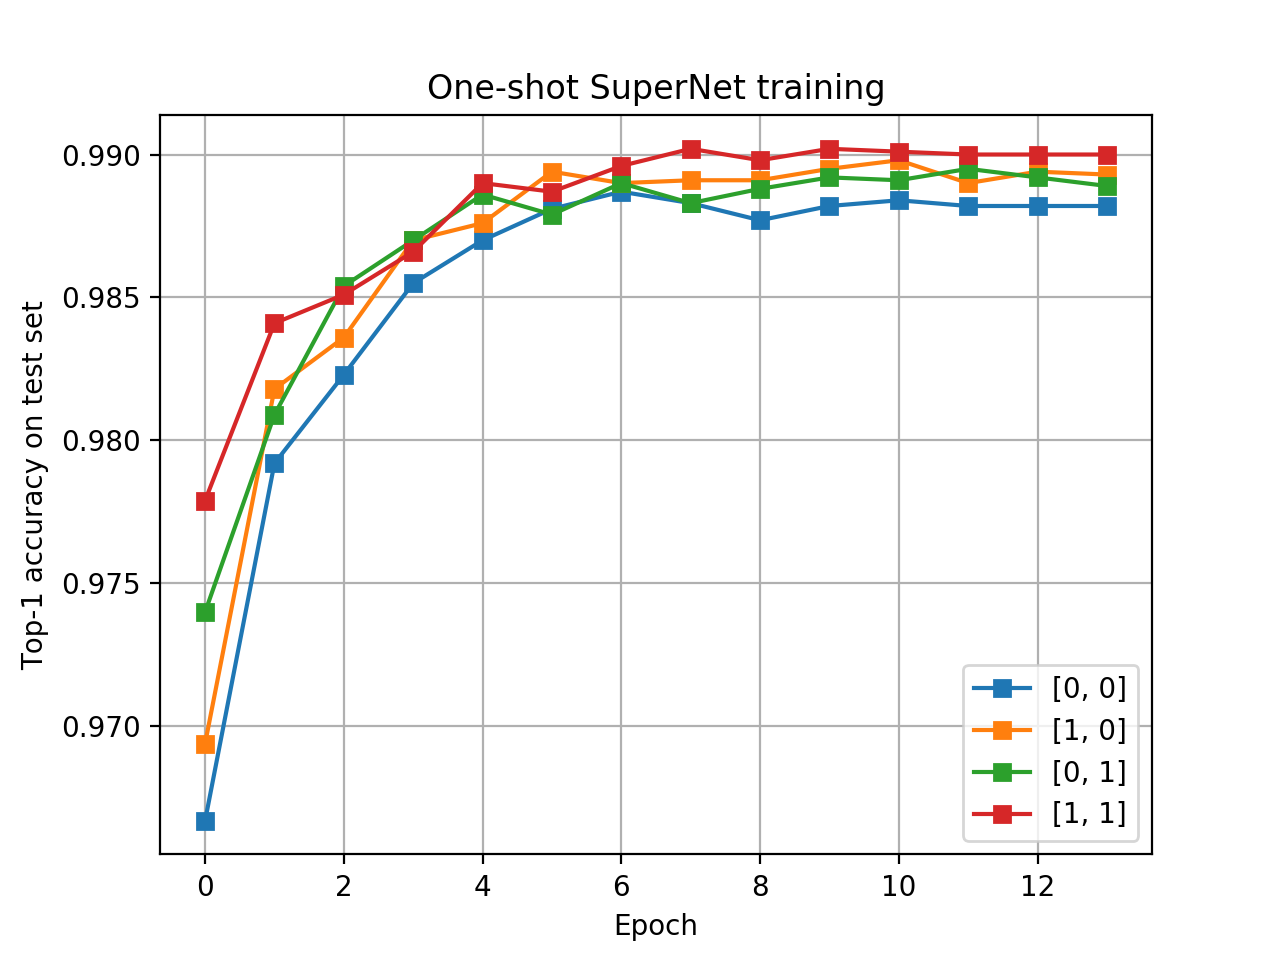

In [28]:
#mpl.style.use(['ggplot'])

fig, ax = plt.subplots()
ax.plot(top1_oneshot, '-s')
ax.grid()
ax.legend([[0,0], [1,0], [0,1], [1,1]])
title('One-shot SuperNet training')
xlabel('Epoch')
ylabel('Top-1 accuracy on test set')
fig.savefig('figures/top1_sampled.png')

### 2. Train stand-alone subnets from scratch

In [42]:
top1_standalone = []
training_settings['epochs'] = 14
for k, subnet in enumerate([[0, 0], [1, 0], [0, 1], [1, 1]]):
    top1_standalone.append(train_supernet_mnist(SuperNet(), training_settings, subnet=subnet))

top1_standalone = np.array(top1_standalone)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.311025
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.314129
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.157533
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.089101
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.108190
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.236131
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.198814
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.065366
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.034965
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.073098
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.092383
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.165343
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.052822
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.036023
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.056871
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.070002
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.133455
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.012705
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.030672
Test set: Average loss: 0.0660, Accuracy: 9783/10000 (98%)


Train Epoch: 9 [16000/60000 (27%)]	Loss: 0.002367
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.000996
Train Epoch: 9 [22400/60000 (37%)]	Loss: 0.000809
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.001829
Train Epoch: 9 [28800/60000 (48%)]	Loss: 0.001208
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.004551
Train Epoch: 9 [35200/60000 (59%)]	Loss: 0.095220
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.021085
Train Epoch: 9 [41600/60000 (69%)]	Loss: 0.002239
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.002869
Train Epoch: 9 [48000/60000 (80%)]	Loss: 0.002081
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.049500
Train Epoch: 9 [54400/60000 (91%)]	Loss: 0.035463
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.002791
Test set: Average loss: 0.0324, Accuracy: 9900/10000 (99%)
Train Epoch: 10 [0/60000 (0%)]	Loss: 0.003401
Train Epoch: 10 [3200/60000 (5%)]	Loss: 0.001271
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.006280
Train Epoch: 10 [9600/60000 (16%)]	Loss: 0.005078
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.00

Train Epoch: 3 [22400/60000 (37%)]	Loss: 0.007860
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.006609
Train Epoch: 3 [28800/60000 (48%)]	Loss: 0.006538
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.045403
Train Epoch: 3 [35200/60000 (59%)]	Loss: 0.157284
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.059999
Train Epoch: 3 [41600/60000 (69%)]	Loss: 0.009479
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.008819
Train Epoch: 3 [48000/60000 (80%)]	Loss: 0.018229
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.092362
Train Epoch: 3 [54400/60000 (91%)]	Loss: 0.006983
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.019604
Test set: Average loss: 0.0311, Accuracy: 9895/10000 (99%)
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.004927
Train Epoch: 4 [3200/60000 (5%)]	Loss: 0.004981
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.023569
Train Epoch: 4 [9600/60000 (16%)]	Loss: 0.060325
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.024229
Train Epoch: 4 [16000/60000 (27%)]	Loss: 0.003682
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.007347


Train Epoch: 11 [35200/60000 (59%)]	Loss: 0.119806
Train Epoch: 11 [38400/60000 (64%)]	Loss: 0.035443
Train Epoch: 11 [41600/60000 (69%)]	Loss: 0.002787
Train Epoch: 11 [44800/60000 (75%)]	Loss: 0.003203
Train Epoch: 11 [48000/60000 (80%)]	Loss: 0.002093
Train Epoch: 11 [51200/60000 (85%)]	Loss: 0.034756
Train Epoch: 11 [54400/60000 (91%)]	Loss: 0.010337
Train Epoch: 11 [57600/60000 (96%)]	Loss: 0.002343
Test set: Average loss: 0.0261, Accuracy: 9920/10000 (99%)
Train Epoch: 12 [0/60000 (0%)]	Loss: 0.001469
Train Epoch: 12 [3200/60000 (5%)]	Loss: 0.000449
Train Epoch: 12 [6400/60000 (11%)]	Loss: 0.004962
Train Epoch: 12 [9600/60000 (16%)]	Loss: 0.009669
Train Epoch: 12 [12800/60000 (21%)]	Loss: 0.009811
Train Epoch: 12 [16000/60000 (27%)]	Loss: 0.000569
Train Epoch: 12 [19200/60000 (32%)]	Loss: 0.001338
Train Epoch: 12 [22400/60000 (37%)]	Loss: 0.001126
Train Epoch: 12 [25600/60000 (43%)]	Loss: 0.001054
Train Epoch: 12 [28800/60000 (48%)]	Loss: 0.000869
Train Epoch: 12 [32000/60000 (53

Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.005915
Train Epoch: 5 [48000/60000 (80%)]	Loss: 0.001966
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.089249
Train Epoch: 5 [54400/60000 (91%)]	Loss: 0.019165
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.004174
Test set: Average loss: 0.0287, Accuracy: 9910/10000 (99%)
Train Epoch: 6 [0/60000 (0%)]	Loss: 0.001071
Train Epoch: 6 [3200/60000 (5%)]	Loss: 0.000212
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.025909
Train Epoch: 6 [9600/60000 (16%)]	Loss: 0.004971
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.017663
Train Epoch: 6 [16000/60000 (27%)]	Loss: 0.003796
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.003347
Train Epoch: 6 [22400/60000 (37%)]	Loss: 0.000624
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.002793
Train Epoch: 6 [28800/60000 (48%)]	Loss: 0.000634
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.016167
Train Epoch: 6 [35200/60000 (59%)]	Loss: 0.089342
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.005877
Train Epoch: 6 [41600/60000 (69%)]	Loss: 0.002964


Train Epoch: 13 [54400/60000 (91%)]	Loss: 0.017554
Train Epoch: 13 [57600/60000 (96%)]	Loss: 0.002041
Test set: Average loss: 0.0262, Accuracy: 9921/10000 (99%)
Train Epoch: 14 [0/60000 (0%)]	Loss: 0.001054
Train Epoch: 14 [3200/60000 (5%)]	Loss: 0.000169
Train Epoch: 14 [6400/60000 (11%)]	Loss: 0.009761
Train Epoch: 14 [9600/60000 (16%)]	Loss: 0.001541
Train Epoch: 14 [12800/60000 (21%)]	Loss: 0.010750
Train Epoch: 14 [16000/60000 (27%)]	Loss: 0.001138
Train Epoch: 14 [19200/60000 (32%)]	Loss: 0.000485
Train Epoch: 14 [22400/60000 (37%)]	Loss: 0.000368
Train Epoch: 14 [25600/60000 (43%)]	Loss: 0.000835
Train Epoch: 14 [28800/60000 (48%)]	Loss: 0.000176
Train Epoch: 14 [32000/60000 (53%)]	Loss: 0.005592
Train Epoch: 14 [35200/60000 (59%)]	Loss: 0.066088
Train Epoch: 14 [38400/60000 (64%)]	Loss: 0.003600
Train Epoch: 14 [41600/60000 (69%)]	Loss: 0.002857
Train Epoch: 14 [44800/60000 (75%)]	Loss: 0.005053
Train Epoch: 14 [48000/60000 (80%)]	Loss: 0.000765
Train Epoch: 14 [51200/60000 (85

Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.001047
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.002838
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.018388
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.003421
Train Epoch: 8 [16000/60000 (27%)]	Loss: 0.003619
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.001230
Train Epoch: 8 [22400/60000 (37%)]	Loss: 0.000811
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.003625
Train Epoch: 8 [28800/60000 (48%)]	Loss: 0.000245
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.000386
Train Epoch: 8 [35200/60000 (59%)]	Loss: 0.144643
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.013882
Train Epoch: 8 [41600/60000 (69%)]	Loss: 0.000453
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.002480
Train Epoch: 8 [48000/60000 (80%)]	Loss: 0.001154
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.030364
Train Epoch: 8 [54400/60000 (91%)]	Loss: 0.012302
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.001160
Test set: Average loss: 0.0299, Accuracy: 9909/10000 (99%)
Train Epoch: 9 [0/60000 (0%)]	Loss: 0.001721


<IPython.core.display.Javascript object>


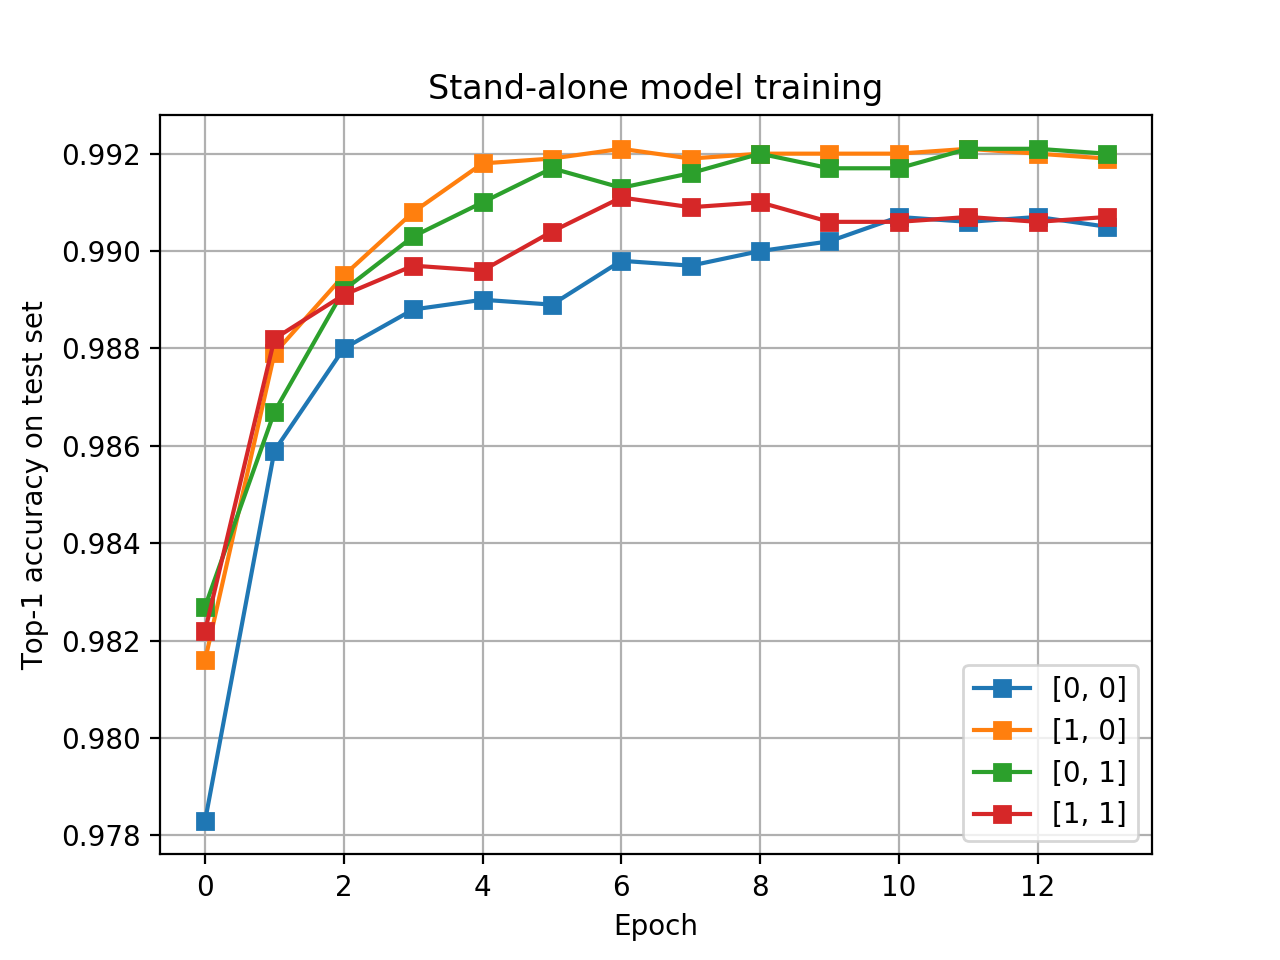

Text(0, 0.5, 'Top-1 accuracy on test set')

In [45]:
fig, ax = plt.subplots()
ax.plot(top1_standalone.T, '-s')
ax.grid()
ax.legend([[0,0], [1,0], [0,1], [1,1]])
title('Stand-alone model training')
xlabel('Epoch')
ylabel('Top-1 accuracy on test set')

<IPython.core.display.Javascript object>


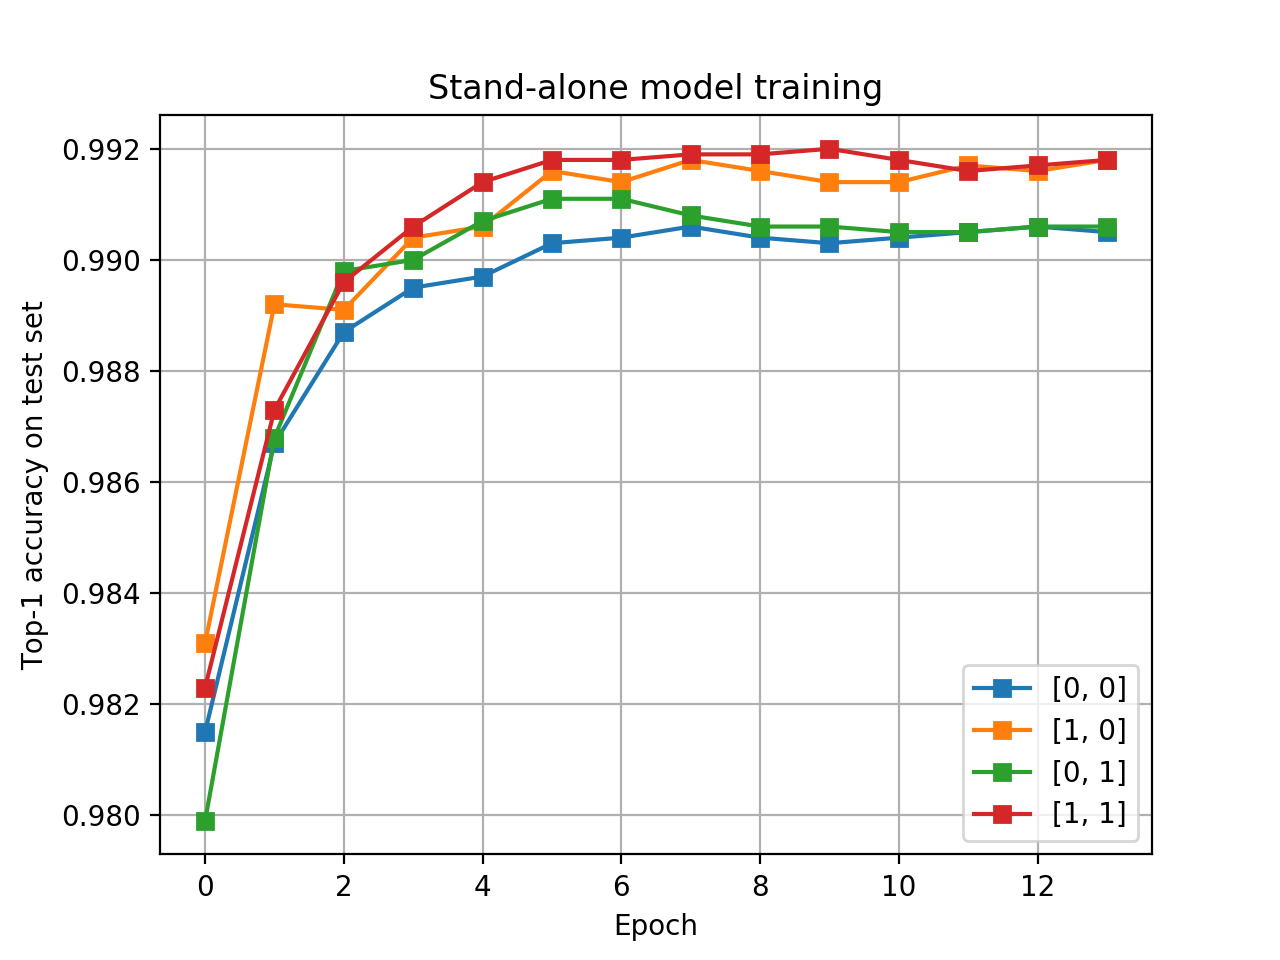

In [25]:
fig, ax = plt.subplots()
ax.plot(top1_standalone_subnets.T, '-s')
ax.grid()
ax.legend([[0,0], [1,0], [0,1], [1,1]])
title('Stand-alone model training')
xlabel('Epoch')
ylabel('Top-1 accuracy on test set')
fig.savefig('figures/top1_standalone.png')

### 3. Evaluation
#### Is the one-shot trained subnet performance predictive of its stand-alone performance?

<IPython.core.display.Javascript object>


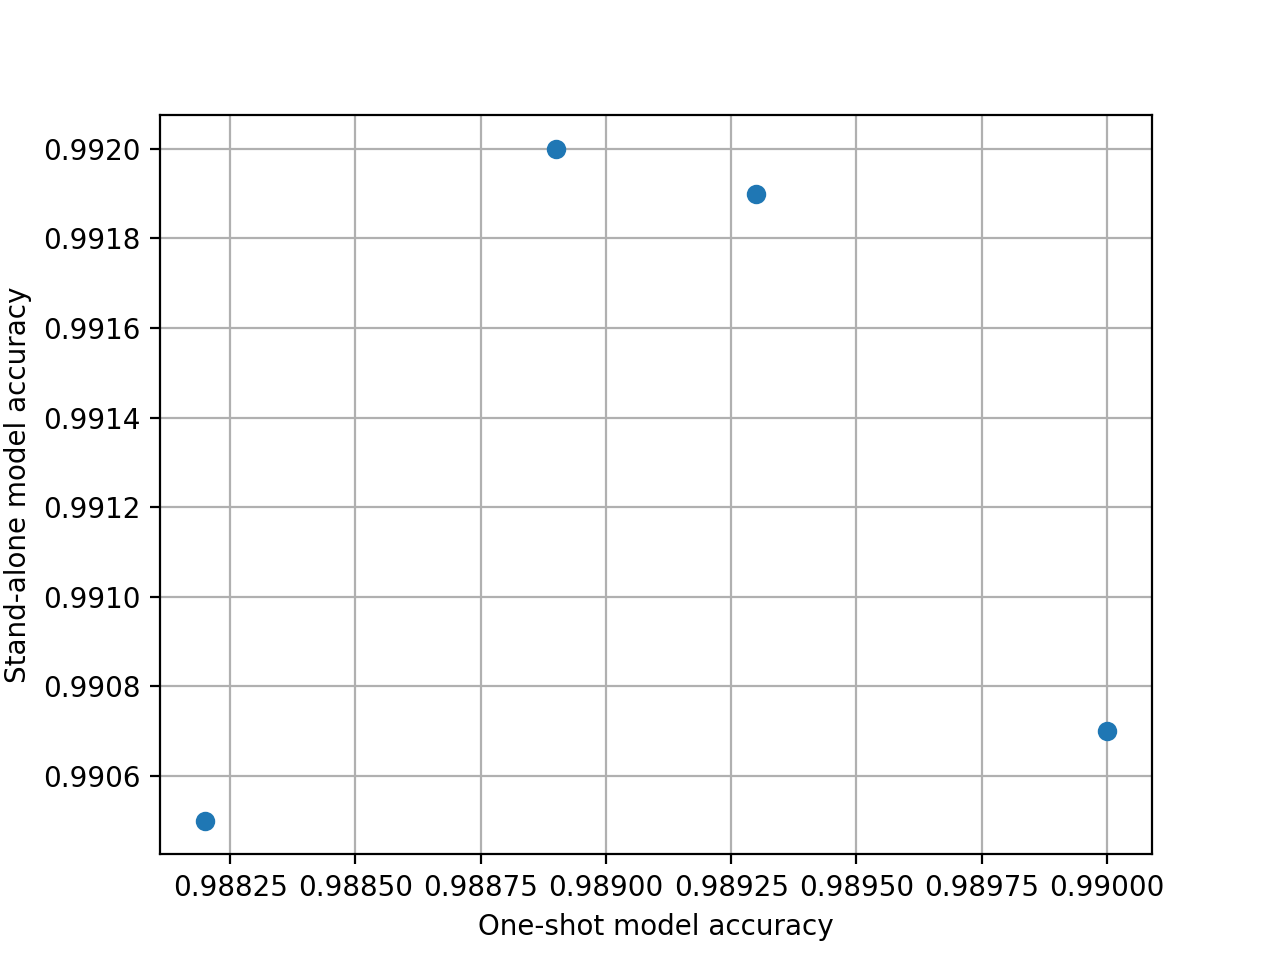

Text(0, 0.5, 'Stand-alone model accuracy')

In [47]:
fig, ax = plt.subplots()
ax.plot(top1_sampled[-1,:], top1_standalone.T[-1,:], 'o')
ax.grid()
xlabel('One-shot model accuracy')
ylabel('Stand-alone model accuracy')
#fig.savefig('figures/oneshot_v_standalone.png')

#### Does one-shot training produce consistent results?

We run one-shot training experiment several times to find out.

In [38]:
oneshot_acc_list = []
training_settings['epochs'] = 14
for s in range(1001, 1009):
    training_settings['seed'] = s
    oneshot_acc_list.append(train_supernet_mnist(SuperNet(), training_settings))

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.309911
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.931349
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.286478
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.178376
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.129252
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.503960
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.171120
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.124808
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.103111
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.156494
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.161535
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.180354
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.103466
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.089765
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.200350
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.307835
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.284773
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.036295
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.148875
Test set: Average loss: 0.0899, Accuracy: 9698/10000 (97%)


Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.001497
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.040067
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.012889
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.031336
Train Epoch: 8 [16000/60000 (27%)]	Loss: 0.009595
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.007583
Train Epoch: 8 [22400/60000 (37%)]	Loss: 0.001915
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.003105
Train Epoch: 8 [28800/60000 (48%)]	Loss: 0.004096
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.049892
Train Epoch: 8 [35200/60000 (59%)]	Loss: 0.158559
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.086759
Train Epoch: 8 [41600/60000 (69%)]	Loss: 0.015384
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.007031
Train Epoch: 8 [48000/60000 (80%)]	Loss: 0.011979
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.087783
Train Epoch: 8 [54400/60000 (91%)]	Loss: 0.021843
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.025395
Test set: Average loss: 0.0307, Accuracy: 9899/10000 (99%)
Test set: Average loss: 0.0300, Accuracy: 990

Test set: Average loss: 0.0284, Accuracy: 9913/10000 (99%)
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.299121
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.741704
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.668649
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.369284
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.197844
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.446041
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.193693
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.144914
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.073057
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.177759
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.201711
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.235038
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.072232
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.118986
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.114330
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.078639
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.162568
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.026052
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.143351


Test set: Average loss: 0.0282, Accuracy: 9895/10000 (99%)
Train Epoch: 8 [0/60000 (0%)]	Loss: 0.001675
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.012584
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.093121
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.057374
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.021377
Train Epoch: 8 [16000/60000 (27%)]	Loss: 0.016361
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.001474
Train Epoch: 8 [22400/60000 (37%)]	Loss: 0.001117
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.004355
Train Epoch: 8 [28800/60000 (48%)]	Loss: 0.006429
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.063760
Train Epoch: 8 [35200/60000 (59%)]	Loss: 0.086358
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.087195
Train Epoch: 8 [41600/60000 (69%)]	Loss: 0.024236
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.041611
Train Epoch: 8 [48000/60000 (80%)]	Loss: 0.003244
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.114754
Train Epoch: 8 [54400/60000 (91%)]	Loss: 0.023074
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.021709


Test set: Average loss: 0.0283, Accuracy: 9901/10000 (99%)
Test set: Average loss: 0.0268, Accuracy: 9916/10000 (99%)
Test set: Average loss: 0.0242, Accuracy: 9918/10000 (99%)
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.302356
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.768189
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.356357
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.326251
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.216877
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.308623
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.308704
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.135056
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.090387
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.093313
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.100255
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.208437
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.118479
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.078038
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.154287
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.115034
Train Epoch: 1 [51200/60000 (85%

Test set: Average loss: 0.0287, Accuracy: 9901/10000 (99%)
Test set: Average loss: 0.0324, Accuracy: 9894/10000 (99%)
Test set: Average loss: 0.0292, Accuracy: 9903/10000 (99%)
Train Epoch: 8 [0/60000 (0%)]	Loss: 0.006521
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.010259
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.129740
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.037485
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.031518
Train Epoch: 8 [16000/60000 (27%)]	Loss: 0.006982
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.025692
Train Epoch: 8 [22400/60000 (37%)]	Loss: 0.000786
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.002661
Train Epoch: 8 [28800/60000 (48%)]	Loss: 0.004129
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.037805
Train Epoch: 8 [35200/60000 (59%)]	Loss: 0.161220
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.043938
Train Epoch: 8 [41600/60000 (69%)]	Loss: 0.003580
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.045778
Train Epoch: 8 [48000/60000 (80%)]	Loss: 0.009166
Train Epoch: 8 [51200/60000 (85%

Train Epoch: 14 [57600/60000 (96%)]	Loss: 0.035011
Test set: Average loss: 0.0302, Accuracy: 9892/10000 (99%)
Test set: Average loss: 0.0265, Accuracy: 9908/10000 (99%)
Test set: Average loss: 0.0290, Accuracy: 9905/10000 (99%)
Test set: Average loss: 0.0266, Accuracy: 9908/10000 (99%)
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.307227
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.713707
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.370210
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.225674
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.193729
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.383813
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.323700
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.238026
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.136799
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.059309
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.147495
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.150678
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.101154
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.100005
Train Epoch: 1 [44800/

Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.099588
Test set: Average loss: 0.0345, Accuracy: 9889/10000 (99%)
Test set: Average loss: 0.0322, Accuracy: 9895/10000 (99%)
Test set: Average loss: 0.0303, Accuracy: 9910/10000 (99%)
Test set: Average loss: 0.0274, Accuracy: 9915/10000 (99%)
Train Epoch: 8 [0/60000 (0%)]	Loss: 0.009970
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.002042
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.053309
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.214526
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.015374
Train Epoch: 8 [16000/60000 (27%)]	Loss: 0.003399
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.005842
Train Epoch: 8 [22400/60000 (37%)]	Loss: 0.002521
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.003862
Train Epoch: 8 [28800/60000 (48%)]	Loss: 0.001695
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.011172
Train Epoch: 8 [35200/60000 (59%)]	Loss: 0.063388
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.043749
Train Epoch: 8 [41600/60000 (69%)]	Loss: 0.004111
Train Epoch: 8 [44800/6

Train Epoch: 14 [51200/60000 (85%)]	Loss: 0.126325
Train Epoch: 14 [54400/60000 (91%)]	Loss: 0.019429
Train Epoch: 14 [57600/60000 (96%)]	Loss: 0.015603
Test set: Average loss: 0.0299, Accuracy: 9900/10000 (99%)
Test set: Average loss: 0.0288, Accuracy: 9893/10000 (99%)
Test set: Average loss: 0.0275, Accuracy: 9914/10000 (99%)
Test set: Average loss: 0.0257, Accuracy: 9917/10000 (99%)
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.293203
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.856186
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.351730
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.181728
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.144110
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.314001
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.430912
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.136849
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.062154
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.126274
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.258518
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.185276
Train Epoch: 1 [3840

Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.103326
Train Epoch: 7 [54400/60000 (91%)]	Loss: 0.023121
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.027107
Test set: Average loss: 0.0343, Accuracy: 9880/10000 (99%)
Test set: Average loss: 0.0316, Accuracy: 9894/10000 (99%)
Test set: Average loss: 0.0296, Accuracy: 9906/10000 (99%)
Test set: Average loss: 0.0284, Accuracy: 9904/10000 (99%)
Train Epoch: 8 [0/60000 (0%)]	Loss: 0.006474
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.007022
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.098983
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.064559
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.023246
Train Epoch: 8 [16000/60000 (27%)]	Loss: 0.011604
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.003090
Train Epoch: 8 [22400/60000 (37%)]	Loss: 0.002707
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.007081
Train Epoch: 8 [28800/60000 (48%)]	Loss: 0.008791
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.041474
Train Epoch: 8 [35200/60000 (59%)]	Loss: 0.150513
Train Epoch: 8 [38400/6

Train Epoch: 14 [44800/60000 (75%)]	Loss: 0.013783
Train Epoch: 14 [48000/60000 (80%)]	Loss: 0.025165
Train Epoch: 14 [51200/60000 (85%)]	Loss: 0.230086
Train Epoch: 14 [54400/60000 (91%)]	Loss: 0.021240
Train Epoch: 14 [57600/60000 (96%)]	Loss: 0.028495
Test set: Average loss: 0.0302, Accuracy: 9896/10000 (99%)
Test set: Average loss: 0.0277, Accuracy: 9902/10000 (99%)
Test set: Average loss: 0.0276, Accuracy: 9908/10000 (99%)
Test set: Average loss: 0.0271, Accuracy: 9907/10000 (99%)
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.313077
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.517422
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.492759
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.236723
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.193310
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.449322
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.263092
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.153774
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.078487
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.098369
Train Epoch: 1 [32

Train Epoch: 7 [41600/60000 (69%)]	Loss: 0.005334
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.068098
Train Epoch: 7 [48000/60000 (80%)]	Loss: 0.008399
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.164337
Train Epoch: 7 [54400/60000 (91%)]	Loss: 0.011728
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.048646
Test set: Average loss: 0.0335, Accuracy: 9892/10000 (99%)
Test set: Average loss: 0.0314, Accuracy: 9902/10000 (99%)
Test set: Average loss: 0.0310, Accuracy: 9896/10000 (99%)
Test set: Average loss: 0.0304, Accuracy: 9899/10000 (99%)
Train Epoch: 8 [0/60000 (0%)]	Loss: 0.010407
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.001686
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.017767
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.014842
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.009140
Train Epoch: 8 [16000/60000 (27%)]	Loss: 0.016203
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.017609
Train Epoch: 8 [22400/60000 (37%)]	Loss: 0.005398
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.015652
Train Epoch: 8 [28800/6

Train Epoch: 14 [35200/60000 (59%)]	Loss: 0.101623
Train Epoch: 14 [38400/60000 (64%)]	Loss: 0.041013
Train Epoch: 14 [41600/60000 (69%)]	Loss: 0.005294
Train Epoch: 14 [44800/60000 (75%)]	Loss: 0.015721
Train Epoch: 14 [48000/60000 (80%)]	Loss: 0.006694
Train Epoch: 14 [51200/60000 (85%)]	Loss: 0.109691
Train Epoch: 14 [54400/60000 (91%)]	Loss: 0.041678
Train Epoch: 14 [57600/60000 (96%)]	Loss: 0.066211
Test set: Average loss: 0.0311, Accuracy: 9895/10000 (99%)
Test set: Average loss: 0.0291, Accuracy: 9912/10000 (99%)
Test set: Average loss: 0.0258, Accuracy: 9915/10000 (99%)
Test set: Average loss: 0.0254, Accuracy: 9917/10000 (99%)
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.304605
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.679919
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.457506
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.138137
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.188121
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.357644
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.302377
Train Epoch: 1 

Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.010337
Train Epoch: 7 [35200/60000 (59%)]	Loss: 0.139618
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.052148
Train Epoch: 7 [41600/60000 (69%)]	Loss: 0.001355
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.076302
Train Epoch: 7 [48000/60000 (80%)]	Loss: 0.006111
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.116497
Train Epoch: 7 [54400/60000 (91%)]	Loss: 0.012894
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.033679
Test set: Average loss: 0.0351, Accuracy: 9886/10000 (99%)
Test set: Average loss: 0.0337, Accuracy: 9896/10000 (99%)
Test set: Average loss: 0.0301, Accuracy: 9902/10000 (99%)
Test set: Average loss: 0.0306, Accuracy: 9895/10000 (99%)
Train Epoch: 8 [0/60000 (0%)]	Loss: 0.015878
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.002409
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.017169
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.087125
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.031469
Train Epoch: 8 [16000/60000 (27%)]	Loss: 0.010438
Train Epoch: 8 [19200/6

Train Epoch: 14 [25600/60000 (43%)]	Loss: 0.009341
Train Epoch: 14 [28800/60000 (48%)]	Loss: 0.001398
Train Epoch: 14 [32000/60000 (53%)]	Loss: 0.001963
Train Epoch: 14 [35200/60000 (59%)]	Loss: 0.134354
Train Epoch: 14 [38400/60000 (64%)]	Loss: 0.022220
Train Epoch: 14 [41600/60000 (69%)]	Loss: 0.001533
Train Epoch: 14 [44800/60000 (75%)]	Loss: 0.069806
Train Epoch: 14 [48000/60000 (80%)]	Loss: 0.003517
Train Epoch: 14 [51200/60000 (85%)]	Loss: 0.074109
Train Epoch: 14 [54400/60000 (91%)]	Loss: 0.036788
Train Epoch: 14 [57600/60000 (96%)]	Loss: 0.010523
Test set: Average loss: 0.0308, Accuracy: 9888/10000 (99%)
Test set: Average loss: 0.0294, Accuracy: 9891/10000 (99%)
Test set: Average loss: 0.0279, Accuracy: 9908/10000 (99%)
Test set: Average loss: 0.0285, Accuracy: 9907/10000 (99%)
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.320224
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.576969
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.479995
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.177777
Train Epoch:

Train Epoch: 7 [22400/60000 (37%)]	Loss: 0.001293
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.002569
Train Epoch: 7 [28800/60000 (48%)]	Loss: 0.002243
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.016457
Train Epoch: 7 [35200/60000 (59%)]	Loss: 0.089940
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.038449
Train Epoch: 7 [41600/60000 (69%)]	Loss: 0.011192
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.022888
Train Epoch: 7 [48000/60000 (80%)]	Loss: 0.007012
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.065836
Train Epoch: 7 [54400/60000 (91%)]	Loss: 0.035785
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.087128
Test set: Average loss: 0.0340, Accuracy: 9891/10000 (99%)
Test set: Average loss: 0.0312, Accuracy: 9890/10000 (99%)
Test set: Average loss: 0.0265, Accuracy: 9899/10000 (99%)
Test set: Average loss: 0.0253, Accuracy: 9916/10000 (99%)
Train Epoch: 8 [0/60000 (0%)]	Loss: 0.004512
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.014948
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.064743
Train Epoch: 8 [9600/6

Train Epoch: 14 [16000/60000 (27%)]	Loss: 0.007347
Train Epoch: 14 [19200/60000 (32%)]	Loss: 0.005854
Train Epoch: 14 [22400/60000 (37%)]	Loss: 0.000485
Train Epoch: 14 [25600/60000 (43%)]	Loss: 0.004169
Train Epoch: 14 [28800/60000 (48%)]	Loss: 0.002198
Train Epoch: 14 [32000/60000 (53%)]	Loss: 0.011471
Train Epoch: 14 [35200/60000 (59%)]	Loss: 0.119140
Train Epoch: 14 [38400/60000 (64%)]	Loss: 0.027463
Train Epoch: 14 [41600/60000 (69%)]	Loss: 0.001231
Train Epoch: 14 [44800/60000 (75%)]	Loss: 0.004499
Train Epoch: 14 [48000/60000 (80%)]	Loss: 0.005839
Train Epoch: 14 [51200/60000 (85%)]	Loss: 0.115774
Train Epoch: 14 [54400/60000 (91%)]	Loss: 0.022845
Train Epoch: 14 [57600/60000 (96%)]	Loss: 0.027364
Test set: Average loss: 0.0300, Accuracy: 9901/10000 (99%)
Test set: Average loss: 0.0268, Accuracy: 9912/10000 (99%)
Test set: Average loss: 0.0237, Accuracy: 9908/10000 (99%)
Test set: Average loss: 0.0228, Accuracy: 9924/10000 (99%)


In [40]:
np.array(oneshot_acc_list).shape

(8, 14, 4)

### 4. Alternative ways to build SuperNet with weight sharing

In [49]:
%autoreload
from supernet.model import SuperNetSum, SuperNetConcat

#### SUM. One-shot accuracy

In [54]:
training_settings['epochs'] = 14
top1_oneshot_SuperNetSum = train_supernet_mnist(SuperNetSum(conv1channels=8, conv2channels=8, hidden=32), 
                                                training_settings)

top1_oneshot_SuperNetSum = np.array(top1_oneshot_SuperNetSum)


Training subnet None

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.309106
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.788342
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.481753
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.276971
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.162657
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.398848
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.373438
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.172315
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.070989
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.084241
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.153414
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.248114
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.129198
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.122752
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.184599
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.126617
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.156265
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.054449
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.209080
Test set: Average loss: 0.0941, Accu

Test set: Average loss: 0.0342, Accuracy: 9883/10000 (99%)
Train Epoch: 8 [0/60000 (0%)]	Loss: 0.009857
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.013759
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.100477
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.067149
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.020139
Train Epoch: 8 [16000/60000 (27%)]	Loss: 0.036661
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.032961
Train Epoch: 8 [22400/60000 (37%)]	Loss: 0.012255
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.011449
Train Epoch: 8 [28800/60000 (48%)]	Loss: 0.003048
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.031245
Train Epoch: 8 [35200/60000 (59%)]	Loss: 0.184003
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.092658
Train Epoch: 8 [41600/60000 (69%)]	Loss: 0.020989
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.052758
Train Epoch: 8 [48000/60000 (80%)]	Loss: 0.017136
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.188814
Train Epoch: 8 [54400/60000 (91%)]	Loss: 0.015154
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.047318


Test set: Average loss: 0.0342, Accuracy: 9881/10000 (99%)
Test set: Average loss: 0.0347, Accuracy: 9885/10000 (99%)
Test set: Average loss: 0.0320, Accuracy: 9892/10000 (99%)


In [55]:
fig, ax = plt.subplots()
ax.plot(top1_oneshot_SuperNetSum, '-s')
ax.grid()
ax.legend([[0,0], [1,0], [0,1], [1,1]])
title('One-shot model training')
xlabel('Epoch')
ylabel('Top-1 accuracy on test set')
fig.savefig('figures/top1_oneshot_SuperNetSum.png')

<IPython.core.display.Javascript object>

#### SUM. Standalone subnet accuracy

In [50]:
top1_SuperNetSum = []
training_settings['epochs'] = 14
for k, subnet in enumerate([[0, 0], [1, 0], [0, 1], [1, 1]]):
    top1_SuperNetSum.append(train_supernet_mnist(SuperNetSum(conv1channels=8, conv2channels=8, hidden=32), 
                                                 training_settings, subnet=subnet))

top1_SuperNetSum = np.array(top1_SuperNetSum)


Training SuperNet

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.339143
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.632288
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.228134
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.127687
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.142698
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.339714
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.275317
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.147296
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.082277
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.120077
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.176954
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.160102
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.105133
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.101901
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.172858
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.158628
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.230931
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.029409
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.165305
Test set: Average loss: 0.0828, Accurac

Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.024716
Train Epoch: 9 [16000/60000 (27%)]	Loss: 0.014735
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.032602
Train Epoch: 9 [22400/60000 (37%)]	Loss: 0.018458
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.005784
Train Epoch: 9 [28800/60000 (48%)]	Loss: 0.004912
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.069194
Train Epoch: 9 [35200/60000 (59%)]	Loss: 0.091202
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.028148
Train Epoch: 9 [41600/60000 (69%)]	Loss: 0.014288
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.063759
Train Epoch: 9 [48000/60000 (80%)]	Loss: 0.035401
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.207998
Train Epoch: 9 [54400/60000 (91%)]	Loss: 0.026072
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.048443
Test set: Average loss: 0.0488, Accuracy: 9843/10000 (98%)
Train Epoch: 10 [0/60000 (0%)]	Loss: 0.027573
Train Epoch: 10 [3200/60000 (5%)]	Loss: 0.014622
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.020050
Train Epoch: 10 [9600/60000 (16%)]	Loss: 0.069

Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.060972
Train Epoch: 3 [22400/60000 (37%)]	Loss: 0.011406
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.023647
Train Epoch: 3 [28800/60000 (48%)]	Loss: 0.027971
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.076476
Train Epoch: 3 [35200/60000 (59%)]	Loss: 0.140318
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.104139
Train Epoch: 3 [41600/60000 (69%)]	Loss: 0.035079
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.048541
Train Epoch: 3 [48000/60000 (80%)]	Loss: 0.027289
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.205371
Train Epoch: 3 [54400/60000 (91%)]	Loss: 0.015510
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.040308
Test set: Average loss: 0.0495, Accuracy: 9833/10000 (98%)
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.009771
Train Epoch: 4 [3200/60000 (5%)]	Loss: 0.026523
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.157230
Train Epoch: 4 [9600/60000 (16%)]	Loss: 0.067053
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.038197
Train Epoch: 4 [16000/60000 (27%)]	Loss: 0.041300


Train Epoch: 11 [32000/60000 (53%)]	Loss: 0.040769
Train Epoch: 11 [35200/60000 (59%)]	Loss: 0.134868
Train Epoch: 11 [38400/60000 (64%)]	Loss: 0.057573
Train Epoch: 11 [41600/60000 (69%)]	Loss: 0.009177
Train Epoch: 11 [44800/60000 (75%)]	Loss: 0.024709
Train Epoch: 11 [48000/60000 (80%)]	Loss: 0.007770
Train Epoch: 11 [51200/60000 (85%)]	Loss: 0.139040
Train Epoch: 11 [54400/60000 (91%)]	Loss: 0.014565
Train Epoch: 11 [57600/60000 (96%)]	Loss: 0.017704
Test set: Average loss: 0.0342, Accuracy: 9887/10000 (99%)
Train Epoch: 12 [0/60000 (0%)]	Loss: 0.011589
Train Epoch: 12 [3200/60000 (5%)]	Loss: 0.013546
Train Epoch: 12 [6400/60000 (11%)]	Loss: 0.130275
Train Epoch: 12 [9600/60000 (16%)]	Loss: 0.064130
Train Epoch: 12 [12800/60000 (21%)]	Loss: 0.014406
Train Epoch: 12 [16000/60000 (27%)]	Loss: 0.014415
Train Epoch: 12 [19200/60000 (32%)]	Loss: 0.007773
Train Epoch: 12 [22400/60000 (37%)]	Loss: 0.001707
Train Epoch: 12 [25600/60000 (43%)]	Loss: 0.015367
Train Epoch: 12 [28800/60000 (48

Train Epoch: 5 [41600/60000 (69%)]	Loss: 0.021806
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.019693
Train Epoch: 5 [48000/60000 (80%)]	Loss: 0.006830
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.111350
Train Epoch: 5 [54400/60000 (91%)]	Loss: 0.024897
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.015457
Test set: Average loss: 0.0403, Accuracy: 9873/10000 (99%)
Train Epoch: 6 [0/60000 (0%)]	Loss: 0.007422
Train Epoch: 6 [3200/60000 (5%)]	Loss: 0.004651
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.014715
Train Epoch: 6 [9600/60000 (16%)]	Loss: 0.056044
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.006256
Train Epoch: 6 [16000/60000 (27%)]	Loss: 0.008869
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.008120
Train Epoch: 6 [22400/60000 (37%)]	Loss: 0.004436
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.006351
Train Epoch: 6 [28800/60000 (48%)]	Loss: 0.006885
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.052253
Train Epoch: 6 [35200/60000 (59%)]	Loss: 0.192936
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.019560


Train Epoch: 13 [51200/60000 (85%)]	Loss: 0.098562
Train Epoch: 13 [54400/60000 (91%)]	Loss: 0.010103
Train Epoch: 13 [57600/60000 (96%)]	Loss: 0.005828
Test set: Average loss: 0.0365, Accuracy: 9888/10000 (99%)
Train Epoch: 14 [0/60000 (0%)]	Loss: 0.002236
Train Epoch: 14 [3200/60000 (5%)]	Loss: 0.001369
Train Epoch: 14 [6400/60000 (11%)]	Loss: 0.014864
Train Epoch: 14 [9600/60000 (16%)]	Loss: 0.039431
Train Epoch: 14 [12800/60000 (21%)]	Loss: 0.002839
Train Epoch: 14 [16000/60000 (27%)]	Loss: 0.005996
Train Epoch: 14 [19200/60000 (32%)]	Loss: 0.004602
Train Epoch: 14 [22400/60000 (37%)]	Loss: 0.002509
Train Epoch: 14 [25600/60000 (43%)]	Loss: 0.005046
Train Epoch: 14 [28800/60000 (48%)]	Loss: 0.002230
Train Epoch: 14 [32000/60000 (53%)]	Loss: 0.014063
Train Epoch: 14 [35200/60000 (59%)]	Loss: 0.184382
Train Epoch: 14 [38400/60000 (64%)]	Loss: 0.014199
Train Epoch: 14 [41600/60000 (69%)]	Loss: 0.009401
Train Epoch: 14 [44800/60000 (75%)]	Loss: 0.009312
Train Epoch: 14 [48000/60000 (80

Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.001014
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.021314
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.132894
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.013167
Train Epoch: 8 [16000/60000 (27%)]	Loss: 0.006178
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.008418
Train Epoch: 8 [22400/60000 (37%)]	Loss: 0.006247
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.011708
Train Epoch: 8 [28800/60000 (48%)]	Loss: 0.006172
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.009285
Train Epoch: 8 [35200/60000 (59%)]	Loss: 0.079567
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.049597
Train Epoch: 8 [41600/60000 (69%)]	Loss: 0.009443
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.006919
Train Epoch: 8 [48000/60000 (80%)]	Loss: 0.006980
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.146527
Train Epoch: 8 [54400/60000 (91%)]	Loss: 0.022496
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.043689
Test set: Average loss: 0.0334, Accuracy: 9901/10000 (99%)
Train Epoch: 9 [0/60000 (0%)]	Loss: 0.002536


<IPython.core.display.Javascript object>


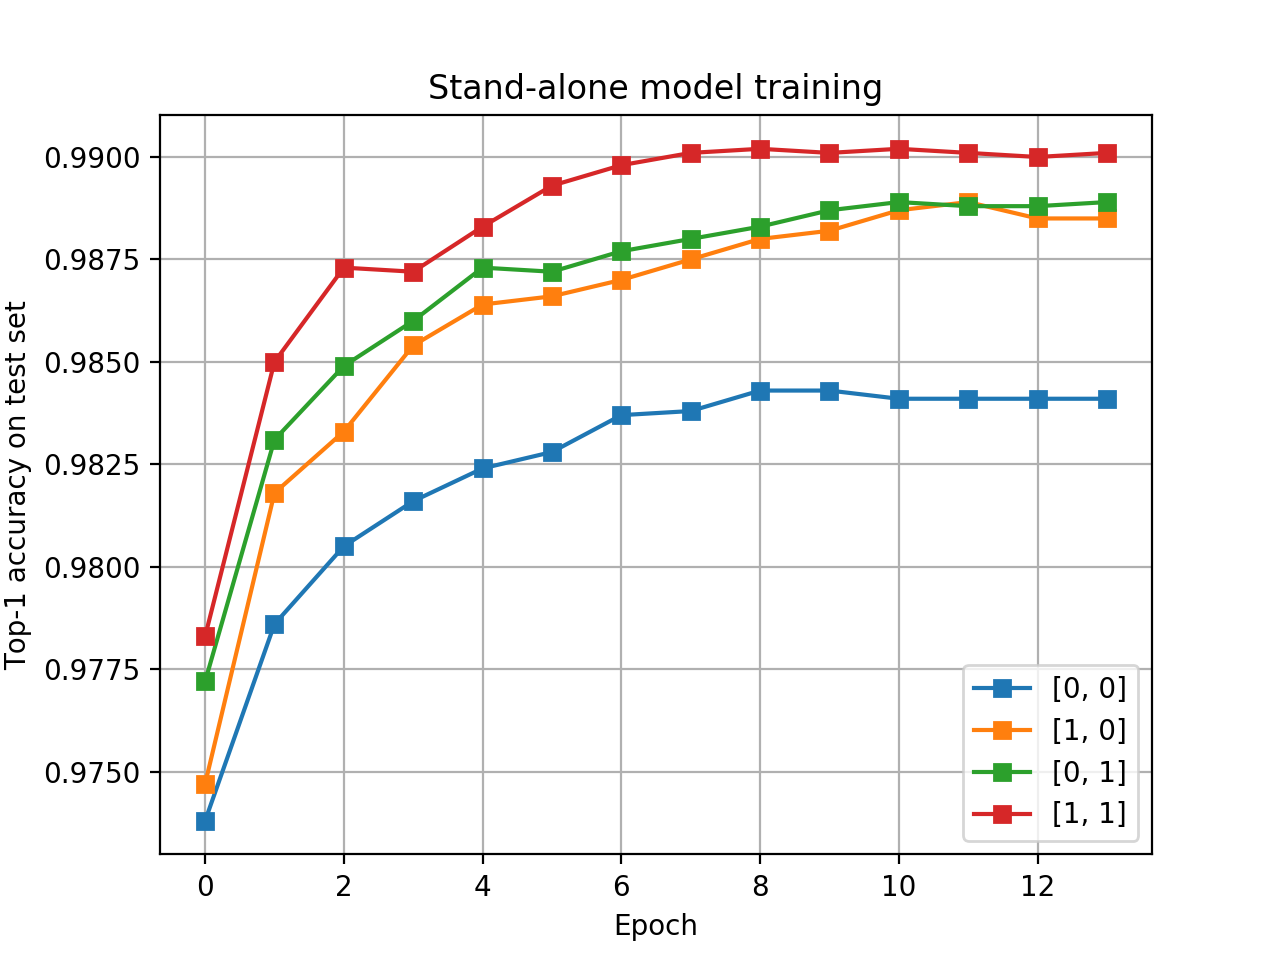

In [53]:
fig, ax = plt.subplots()
ax.plot(top1_SuperNetSum.T, '-s')
ax.grid()
ax.legend([[0,0], [1,0], [0,1], [1,1]])
title('Stand-alone model training')
xlabel('Epoch')
ylabel('Top-1 accuracy on test set')
fig.savefig('figures/top1_standalone_SuperNetSum.png')

#### Concat. One-shot accuracy

In [ ]:
top1_oneshot_SuperNetConcat = train_supernet_mnist(SuperNetConcat(conv1channels=8, conv2channels=8, hidden=32), 
                                                   training_settings)

top1_oneshot_SuperNetConcat = np.array(top1_oneshot_SuperNetConcat)


Training SuperNet

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.309607
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.135206
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.006648
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.429230
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.366571
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.503644
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.472589
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.304385
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.114107
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.185360
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.276040
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.188924
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.166338
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.151612
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.226267
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.152927
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.145647
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.082402
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.241091
Test set: Average loss: 0.1566, Accurac

In [ ]:
fig, ax = plt.subplots()
ax.plot(top1_oneshot_SuperNetConcat, '-s')
ax.grid()
ax.legend([[0,0], [1,0], [0,1], [1,1]])
title('One-shot model training')
xlabel('Epoch')
ylabel('Top-1 accuracy on test set')
fig.savefig('figures/top1_oneshot_SuperNetConcat.png')

#### Concat. Stand-alone accuracy

In [ ]:
top1_standalone_SuperNetConcat = []
for k, subnet in enumerate([[0, 0], [1, 0], [0, 1], [1, 1]]):
    top1_standalone_SuperNetConcat.append(train_supernet_mnist(SuperNetConcat(conv1channels=8, conv2channels=8, hidden=32), 
                                                    training_settings, subnet=subnet))

top1_standalone_SuperNetConcat = np.array(top1_standalone_SuperNetConcat)